In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/pcos_dataset.csv'

data = pd.read_csv(file_path)

data.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [3]:
data.isnull().sum()

,0
Age,0
BMI,0
Menstrual_Irregularity,0
Testosterone_Level(ng/dL),0
Antral_Follicle_Count,0
PCOS_Diagnosis,0


In [4]:
pd.value_counts(data['PCOS_Diagnosis'])

<ipython-input-4-7d44dcef7569>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['PCOS_Diagnosis'])


,count
PCOS_Diagnosis,
0,801
1,199


Data is highly imbalanced so we should use some balancing technique


In [5]:
data.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


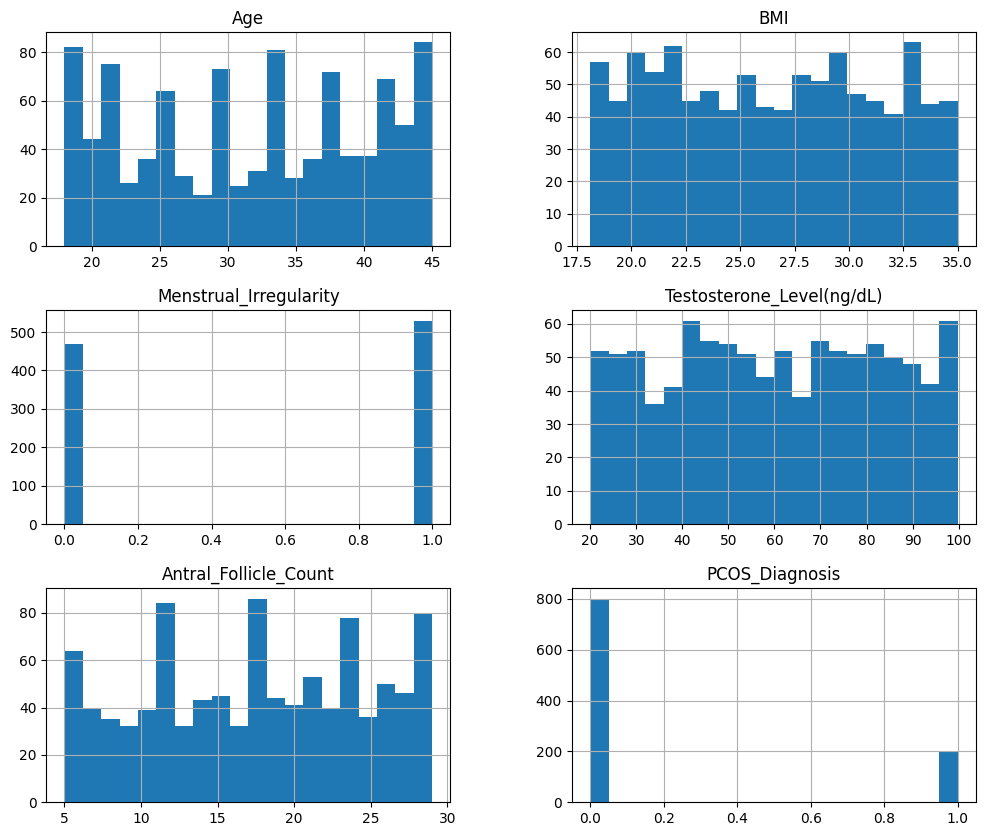

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


data.hist(bins=20, figsize = (12, 10))
plt.show()

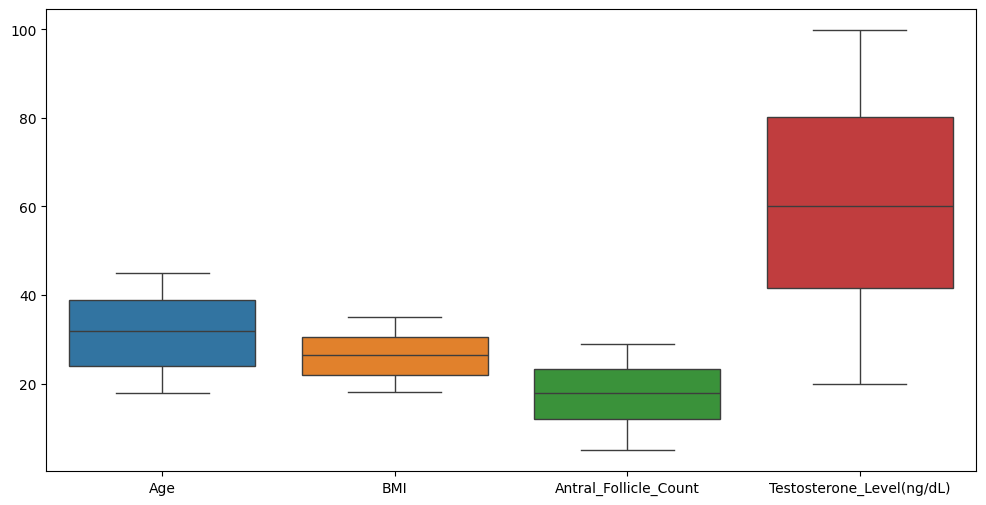

In [7]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = data[['Age','BMI','Antral_Follicle_Count','Testosterone_Level(ng/dL)']])
plt.show()

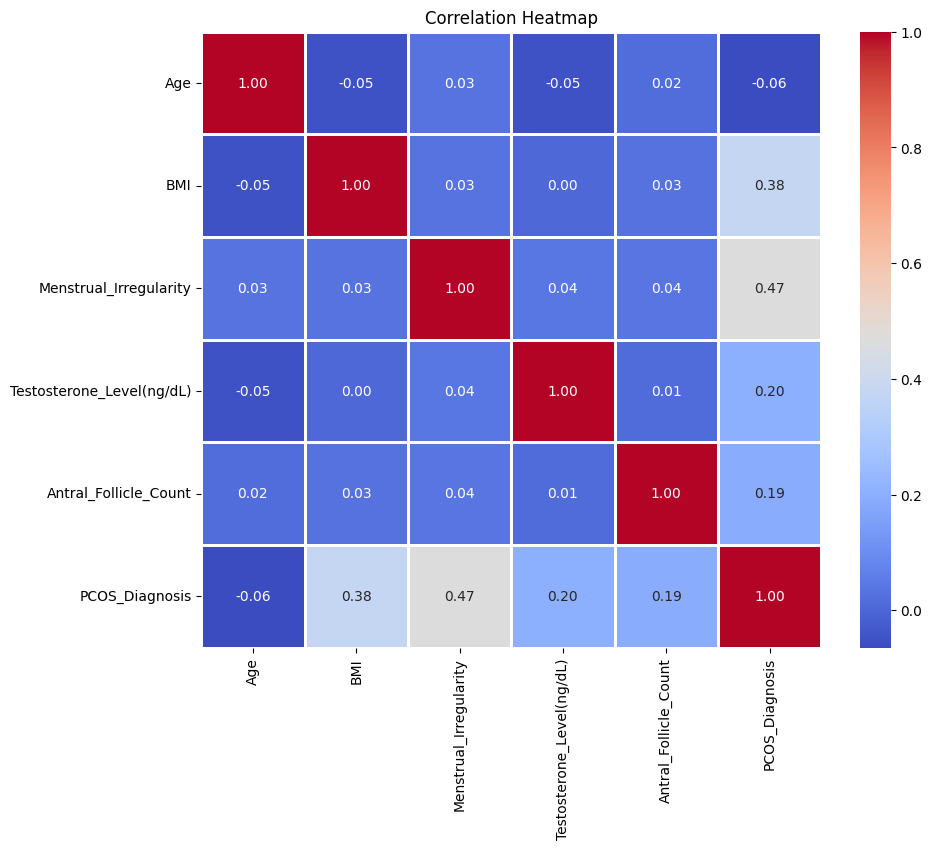

In [8]:
# Compute correlation matrix
corr = data.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap")
plt.show()


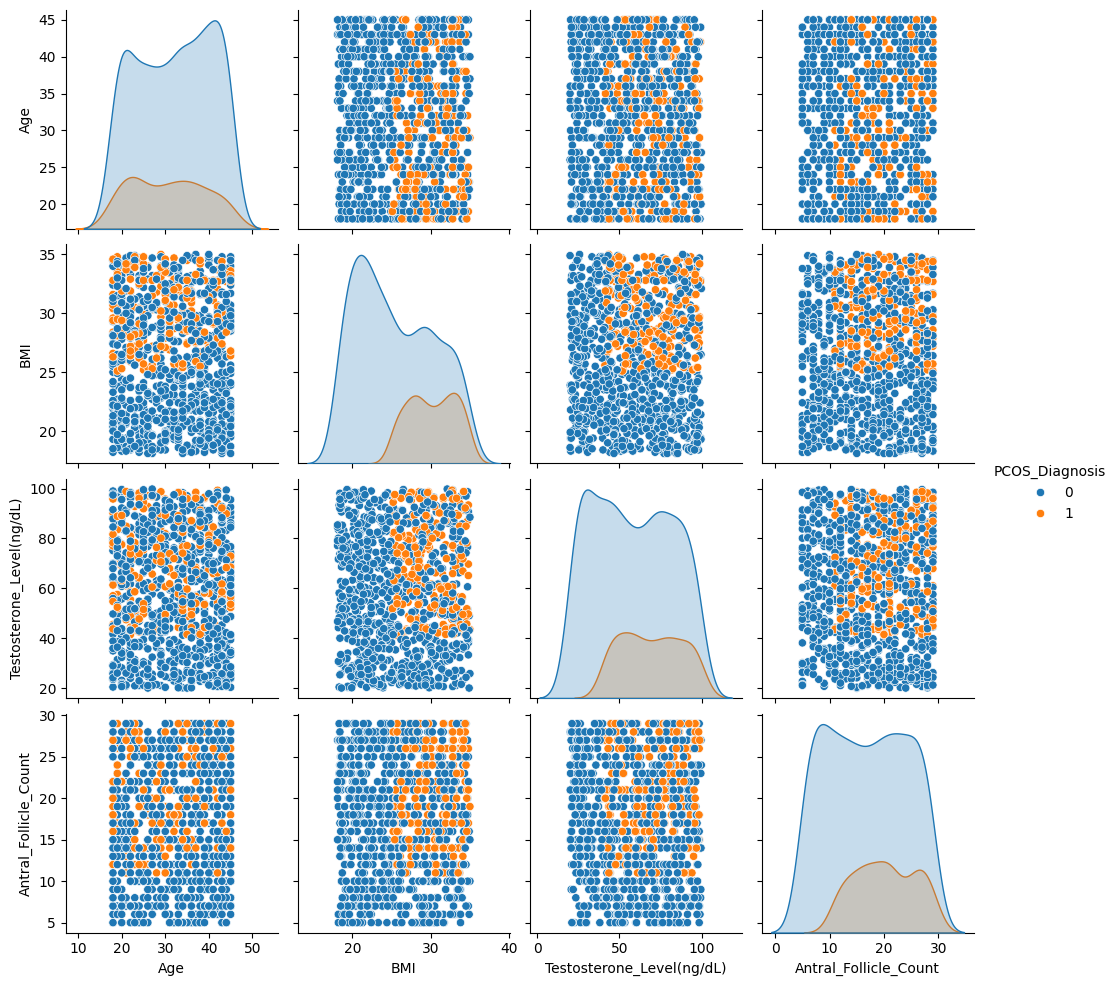

In [9]:
# Pairplot for some numerical features
sns.pairplot(data[['Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count', 'PCOS_Diagnosis']], hue='PCOS_Diagnosis')
plt.show()


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [11]:
data.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [25]:
X = data.drop('PCOS_Diagnosis', axis = 1)
y = data['PCOS_Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [27]:
print(X_train.shape)
print(y_train.shape)

(800, 5)
(800,)


In [28]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(Counter(y_resampled))


Counter({0: 640, 1: 640})


In [35]:
rf = RandomForestClassifier(random_state = 42)

param_grid = {
    'n_estimators' : [50, 100, 150, 200],
    'max_depth' : [None, 10, 20, 30 , 40],
    'min_samples_split' : [2, 5, 10, 15],
    'min_samples_leaf' : [1, 2, 4, 8],
    'max_features' : ['sqrt', 'log2'],
    'bootstrap' : [True, False]
}

random_search = RandomizedSearchCV(
    estimator = rf,
    param_distributions = param_grid,
    n_iter = 20,
    scoring = 'accuracy',
    cv = 5,
    verbose = 2,
    random_state = 42,
    n_jobs = -1
)

random_search.fit(X_resampled, y_resampled)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [36]:
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}
Best Score:  1.0


In [85]:
rf_classifier_new = RandomForestClassifier(
    n_estimators = 50,
    max_depth = 40,
    min_samples_split = 10,
    min_samples_leaf = 2,
    max_features = 'log2',
    bootstrap = False,
    random_state = 42
)


rf_classifier_new.fit(X_resampled, y_resampled)
cv_results_rf = cross_val_score(rf_classifier_new, X_resampled, y_resampled, cv=5, scoring='accuracy')


print(f"Random Forest - Cross-validation results: {cv_results_rf}")



Random Forest - Cross-validation results: [1. 1. 1. 1. 1.]


In [81]:
y_pred_rf= rf_classifier_new.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Accuracy:  0.995
Precision:  1.0
Recall:  0.9743589743589743
F1 Score:  0.987012987012987


In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


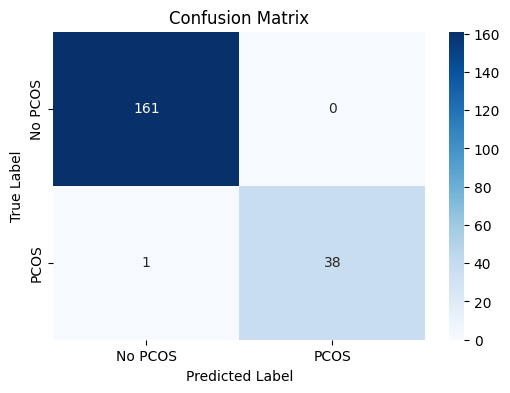

In [83]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No PCOS', 'PCOS'], yticklabels=['No PCOS', 'PCOS'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#XGBoost

In [44]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid_2 = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [3, 5, 7],
    'learning_rate' : [0.01, 0.1, 0.2],
    'subsample' : [0.8,1.0],
    'colsample_bytree' : [0.8, 1.0],
    'gamma' : [0, 0.1, 0.2]
}

xgb_classifier = xgb.XGBClassifier(use_label_encoder = False, eval_matrix = 'logloss',random_state = 42 )

grid_search_2 = GridSearchCV(
    estimator = xgb_classifier,
    param_grid = param_grid_2,
    scoring = 'accuracy',
    cv = 5,
    verbose = 2,
    n_jobs = -1
)

In [75]:
best_xgb = xgb.XGBClassifier(**grid_search_2.best_params_, use_label_encoder=False, eval_metric='logloss', random_state=42, cv = 5)
cv_scores_xgb = cross_val_score(best_xgb, X_resampled, y_resampled, cv=5, scoring='accuracy')

best_xgb.fit(X_resampled, y_resampled)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:34:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "cv", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:34:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "cv", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:34:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "cv", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:34:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "cv", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:34:46] WARNING: /workspace/src/learner.cc:740: 
Pa

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, cv=5, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [76]:
y_pred_xgb = best_xgb.predict(X_test)

In [77]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: ", accuracy_xgb)

Accuracy:  0.995


In [78]:
precision_xgb = precision_score(y_test, y_pred_xgb)
print("Precision: ", precision_xgb)

Precision:  1.0


In [79]:
recall_xgb = recall_score(y_test, y_pred_xgb)
print("Recall: ", recall_xgb)

Recall:  0.9743589743589743


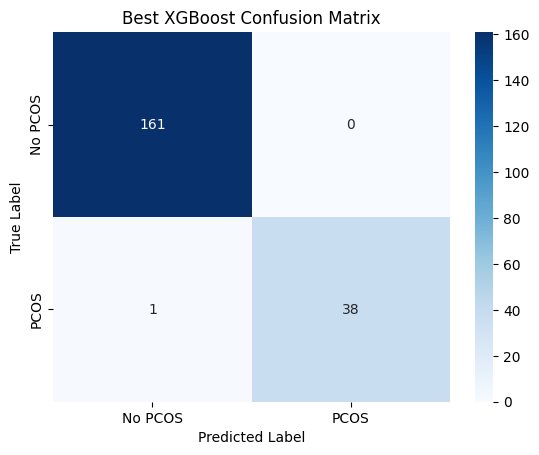

In [74]:
cm_best_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_best_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No PCOS', 'PCOS'], yticklabels=['No PCOS', 'PCOS'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Best XGBoost Confusion Matrix')
plt.show()

In [63]:
print(y_train.value_counts())  # Before SMOTE
print(pd.Series(y_resampled).value_counts())  # After SMOTE


PCOS_Diagnosis
0    640
1    160
Name: count, dtype: int64
PCOS_Diagnosis
0    640
1    640
Name: count, dtype: int64


Random Forest AUC: 0.9985666507405638
XGBoost AUC: 0.9987259117693901


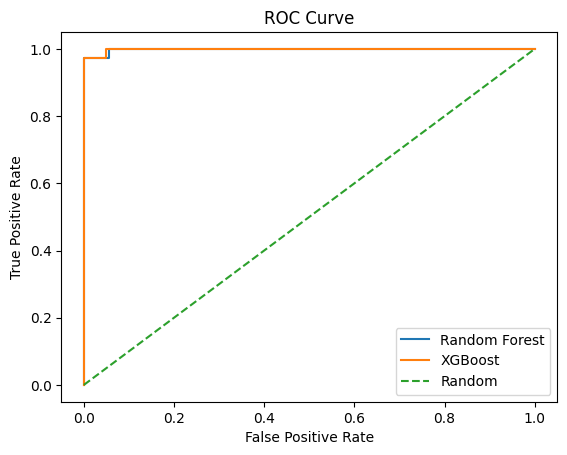

In [64]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities for ROC curve
y_pred_prob_rf = rf_classifier_new.predict_proba(X_test)[:, 1]
y_pred_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Calculate AUC
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

print("Random Forest AUC:", auc_rf)
print("XGBoost AUC:", auc_xgb)

# Plot ROC Curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)

plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [86]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()

lg_model.fit(X_resampled, y_resampled)


LogisticRegression()

In [87]:
y_pred_lg = lg_model.predict(X_test)

In [88]:
accuracy_lg = accuracy_score(y_test, y_pred_lg)
print("Accuracy: ", accuracy_lg)

Accuracy:  0.87


<Axes: >

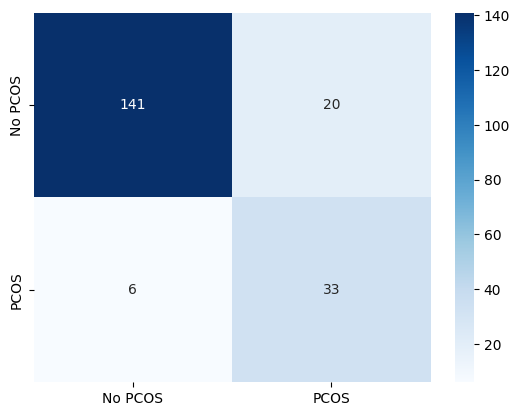

In [89]:
cm_lg = confusion_matrix(y_test, y_pred_lg)
sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Blues', xticklabels=['No PCOS', 'PCOS'], yticklabels=['No PCOS', 'PCOS'])

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

dt_model.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [91]:
y_pred_dtree = dt_model.predict(X_test)

In [92]:
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print("Accuracy: ", accuracy_dtree)

Accuracy:  0.995
